<div style="text-align:center">
    
# Titanic - Machine Learning from Disaster

### Kaggle Competition

#### By
    
#### Paul Sandeen
    
</div>

## Introduction

The RMS Titanic was a steamship ocean liner flying the British flag. She was built by Harland and Wolff in Belfast, Ireland at a cost and estimated $7.5 million. Her maiden voyage departed from Southampton, England on April 10, 1912. She picked up passengers at two other ports and departed for New York, USA. On April 14 at 11:40 PM, Titanic’s starboard bow collided with an iceberg while the ship was traveling at 20.5 knots. Titanic sank at 2:20 AM. Over 1,500 passengers and crew died while 705 survived.
(Source: https://www.si.edu/spotlight/titanic)

This project looks at several data features of the passengers of the Titanic to predict who survived and who did not. The data features include which cabin class the passenger stayed in, their sex, their age, if the passenger had siblings or a spouse, if the passenger had parents or children, the Fare paid by the passenger, and where the passenger embarked (Southampton, Cherbourg, Queenstown).

Nine separate machine learning classifier models are used to make survival predictions. The models are compared and based on a technique called cross-validation, the optimal model is selected.


## Intended Audience

This project is intended for students, educators, data scientists, and anyone interested in understanding who survived the sinking of the Titanic. Familiarity with the Python computer programming language is required, and knowledge of basic Data Science and Machine Learning terms and techniques is assumed.

## Materials and Methods

This project uses the Python computer programming language running in the Anaconda environment. 

Associated Python libraries used for data analysis: Numpy, pandas, Matplotlib, Seaborn.

Associated Python libraries used for machine learning: scikit-learn.

The project was composed as a Jupyter Notebook.

## Dataset Source

Kaggle: 'Titanic - Machine Learning from Disaster'</br>
https://www.kaggle.com/c/titanic/data</br>
Download File: titanic.zip</br>
Three (3) File Contents: test.csv, train.csv, gender_submission.csv

## Import the Data Science Libraries

In [1]:
# Import the numpy and pandas libraries for data analysis methods
import numpy as np
import pandas as pd
from collections import Counter

# Import the Matplotlib and Seaborn libraries to create plots
import matplotlib.pyplot as plt
import seaborn as sns

# Import the scikit-learn Machine Learning Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector

# Display plots inside the Jupypter notebook
%matplotlib inline

## Import the Data

<b>Note:</b> The archive 'titanic.zip' downloaded from the Kaggle website is divided into 3 files: 'train.csv', 'test.csv' and 'gender_submission.csv'.<br> 
The file 'gender_submission.csv' is an example of what the predictcions should look like. In this file all females are predicted to survive and all males are predicted to not survive.

In [2]:
# Read the 'train' data into a pandas DataFrame
df_train = pd.read_csv(filepath_or_buffer='data/titanic/train.csv', sep=',')

# Read the 'test' data into a pandas DataFrame
df_test = pd.read_csv(filepath_or_buffer='data/titanic/test.csv', sep=',')


## Data Wrangling – Inspecting, Cleaning and Organizing Data

#### Inspect the 'train' data

In [3]:
# Display the first and last columns of the training data
pd.concat([df_train.head(1), df_train.tail(1)])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<b>Result Interpretation:</b> There are 891 rows (0-890) in the ‘training’ data with 12 columns.

In [4]:
# Display the data types of the 'train' DataFrame
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<b>Result Interpretation:</b> The 'train' data is a mix of integer numbers, floating point numbers and string (object) data.

In [5]:
# Find any missing data
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<b>Result Interpretation:</b> The ‘Cabin’ column is missing 687 data entries (out of 891). ‘Age’ is missing 177 entries. ‘Embarked’ is missing 2 entries. The other data entries are complete.

#### Inspect the 'test' data

In [6]:
# Display the first and last columns of the testing data
pd.concat([df_test.head(1), df_test.tail(1)])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


<b>Result Interpretation:</b> There are 418 rows (0-417) in the ‘testing' data with 11 columns. The ‘Survived’ column was dropped from the ‘training data to make the ‘testing’ data. There is no redundant data.

In [7]:
# Display the data types of the 'train' DataFrame
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<b>Result Interpretation:</b> The 'test' data is a mix of integer numbers, floating point numbers and string (object) data.

In [8]:
# Find any missing data
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<b>Result Interpretation:</b> The ‘Cabin’ column is missing 327 data entries (out of 418). ‘Age’ is missing 86 entries. ‘Fare’ is missing 1 entry. The other data entries are complete.

#### Data Features

<pre>
Data Dictionary Provided by Kaggle:  
https://www.kaggle.com/c/titanic/data    

<b>Variable	      Definition	                                      Key</b>

PassengerId           Identification Number of the Passenger	
Survived	      Did the passanger escape Titanic alive                  0 = No, 1 = Yes
Pclass	              Ticket class	                                      1 = 1st, 2 = 2nd, 3 = 3rd
Sex	              Sex of the passenger                                    male, female	
Age	              Age in years	
SibSp	              # of siblings / spouses aboard the Titanic	
Parch	              # of parents / children aboard the Titanic	
Ticket	              Ticket number	
Fare	              Passenger fare	
Cabin	              Cabin number	
Embarked	      Port of Embarkation	                              C = Cherbourg, Q = Queenstown, S = Southampton
</pre>

#### Clean the Data - Remove Columns

In [9]:
# Since the passenger name does not provide helpful information, drop the 'Name' column
df_train.drop(columns=['Name'], inplace=True)
df_test.drop(columns=['Name'], inplace=True)

In [10]:
# Since the ticket information does not provide helpful information, drop the 'Ticket' column
df_train.drop(columns=['Ticket'], inplace=True)
df_test.drop(columns=['Ticket'], inplace=True)

In [11]:
# Since 77% (687 entries out of 891) of the data in the 'Cabin' column is NaN or missing, drop the 'Cabin' column.
df_train.drop(columns=['Cabin'], inplace=True)
df_test.drop(columns=['Cabin'], inplace=True)

#### Clean the Data - Remove Rows with Missing Data

In [12]:
# Drop the 2 NaN or missing values from 'Embarked' from the 'train' data set
df_train.dropna(subset=['Embarked'], inplace=True)

In [13]:
# Drop the 1 NaN or missing value from 'Fare' from the 'test' data set
df_test.dropna(subset=['Fare'],inplace=True) 

#### Clean the Data - Fill Missing Data

In [14]:
# Fill the missing 'Age' values with the average age from each DataSet
average_age_train = df_train['Age'].mean()
average_age_test = df_test['Age'].mean()

# Fill in the missing values for 'Age' for each DataSet
df_train['Age'] = df_train['Age'].fillna(average_age_train)
df_test['Age'] = df_test['Age'].fillna(average_age_test)

#### Organize the Data - Enumerate Categorical Data

In [15]:
# The value of 'Sex' is male or female; change to 1 or 0.
# Create a dictionary that maps male to 1 and female to 0
sex_remapping = {'male': 1, 'female': 0}

# Re-map 'Sex' using the sex-remapping dictionary
df_train['Sex'] = df_train['Sex'].map(sex_remapping)
df_test['Sex'] = df_test['Sex'].map(sex_remapping)

In [16]:
# The value of 'Embarked' is C = Cherbourg, Q = Queenstown, S = Southampton
# Change to C = 1, Q = 2, S = 3
# Create a dictionary that maps male to 1 and female to 0
embarked_remapping = {'C': 1, 'Q': 2, 'S': 3}

# Re-map 'Embarked' using the embarked-remapping dictionary
df_train['Embarked'] = df_train['Embarked'].map(embarked_remapping).astype(int)
df_test['Embarked'] = df_test['Embarked'].map(embarked_remapping).astype(int)

#### Organize the Data - Change the name of the 'SibSp' Column

In [17]:
# Rename the 'SibSp' column to 'Siblings_Spouses'
df_train.rename(columns={'SibSp': 'Siblings_Spouses'}, inplace=True)
df_test.rename(columns={'SibSp': 'Siblings_Spouses'}, inplace=True)

#### Organize the Data - Change the name of the 'Parch' Column

In [18]:
# Rename the 'Parch' column to 'Parents_Children'
df_train.rename(columns={'Parch': 'Parents_Children'}, inplace=True)
df_test.rename(columns={'Parch': 'Parents_Children'}, inplace=True)

#### Verify the 'Train' Data

In [19]:
# Display the first and last columns of the testing data
pd.concat([df_test.head(1), df_test.tail(1)])

,PassengerId,Pclass,Sex,Age,Siblings_Spouses,Parents_Children,Fare,Embarked
0,892,3,1,34.500000,0,0,7.8292,2
417,1309,3,1,30.181269,1,1,22.3583,1


In [20]:
# Display the data types of the 'train' DataFrame
df_train.dtypes

PassengerId           int64
Survived              int64
Pclass                int64
Sex                   int64
Age                 float64
Siblings_Spouses      int64
Parents_Children      int64
Fare                float64
Embarked              int32
dtype: object

In [21]:
# Find any missing data
df_train.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Sex                 0
Age                 0
Siblings_Spouses    0
Parents_Children    0
Fare                0
Embarked            0
dtype: int64

<b>Result Interpretation:</b> There are now nine columns in the ‘train’ DataFrame; all data is integer numbers or floating point numbers and there is no missing data.

#### Verify the 'Test' Data

In [22]:
# Display the first and last columns of the testing data
pd.concat([df_test.head(1), df_test.tail(1)])

,PassengerId,Pclass,Sex,Age,Siblings_Spouses,Parents_Children,Fare,Embarked
0,892,3,1,34.500000,0,0,7.8292,2
417,1309,3,1,30.181269,1,1,22.3583,1


In [23]:
# Display the data types of the 'train' DataFrame
df_test.dtypes

PassengerId           int64
Pclass                int64
Sex                   int64
Age                 float64
Siblings_Spouses      int64
Parents_Children      int64
Fare                float64
Embarked              int32
dtype: object

In [24]:
# Find any missing data
df_test.isnull().sum()

PassengerId         0
Pclass              0
Sex                 0
Age                 0
Siblings_Spouses    0
Parents_Children    0
Fare                0
Embarked            0
dtype: int64

<b>Result Interpretation:</b> There are now eight columns in the ‘test’ DataFrame; all data is integer numbers or floating point numbers and there is no missing data.

## EDA - Exploratory Data Analysis

#### Visualize the Data - Histograms

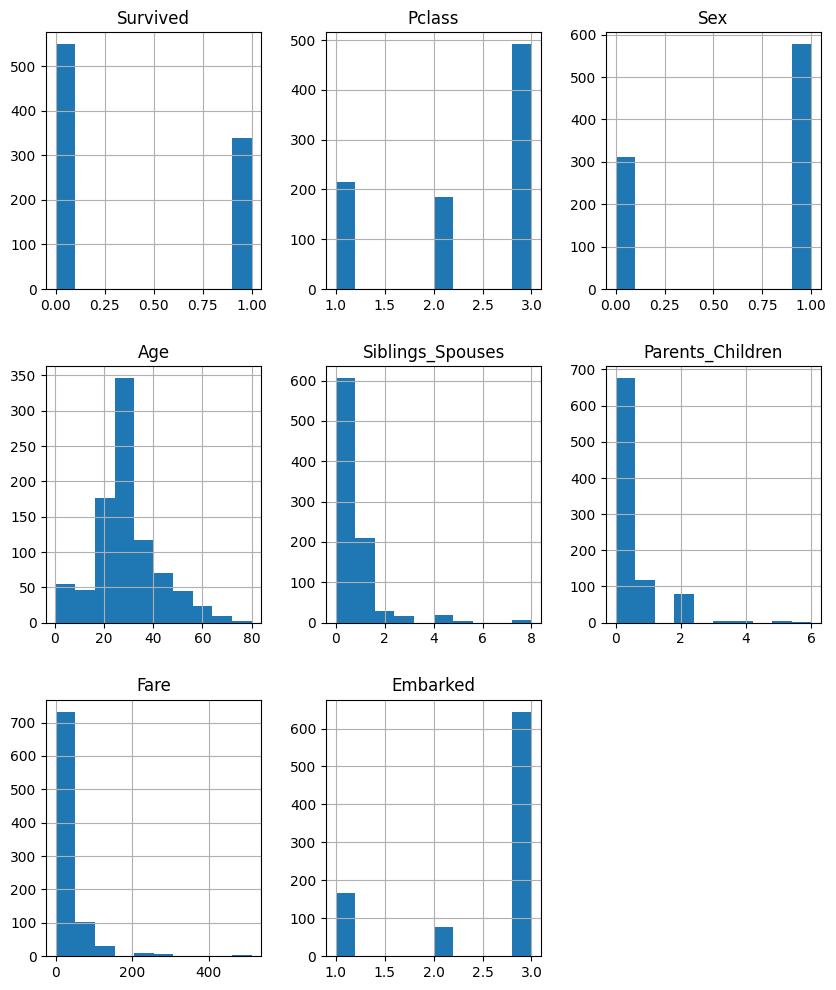

In [25]:
# Display a histogram of the 'train' data
df_train.drop(columns=['PassengerId']).hist(figsize=(10, 12))
plt.show()

<b>Result Interpretation</b> The ‘Survived’, ‘Pclass’, ‘Sex’, and ‘Embarked’ are categorical data. More passengers did not survive (they died) than did survive (they lived) by a factor of almost 2:1.  Most passengers were in third class (Pclass = 3).  There were more males than females by a ratio of almost 2:1. Most passengers embarked at port 3 (‘Embarked’ = Southampton). ‘SibSp’,‘Parch’  and ‘Fare’ are numerical data but do follow a normal distribution and are skewed to the right. ‘Age’ should be a normal distribution but seems centered around 25-30 years old, with outliers moving toward 80 years old.

#### Visualize the Data - Scatter Plot

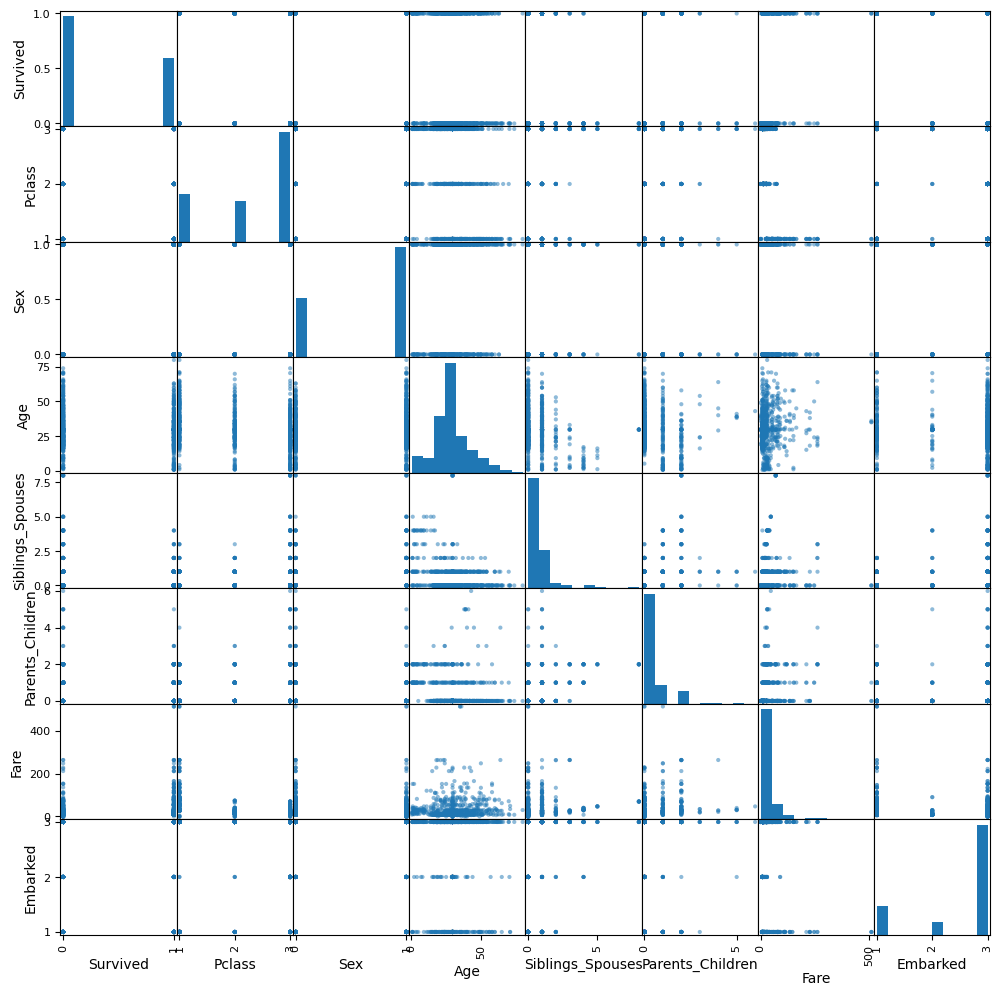

In [26]:
# Display the scatter plot of the data
scatter_matrix(df_train.drop(columns=['PassengerId']),figsize=(12, 12))
plt.show()

<b>Result Interpretation:</b> The Scatter plot is useful for finding outliers. There are many outliers when comparing ‘Age’ with ‘Fare’: many passengers paid a much higher Fare than others, and this can be seen when comparing ‘Fare’ with ‘Pclass’. Note that even passengers in Third class (Pclass=3) paid a high Fare.

#### Visualize the Data - Feature Correlation

In [27]:
# Calculate the correlation matrix
correlation_matrix = df_train.drop(columns=['PassengerId']).corr(method='pearson')

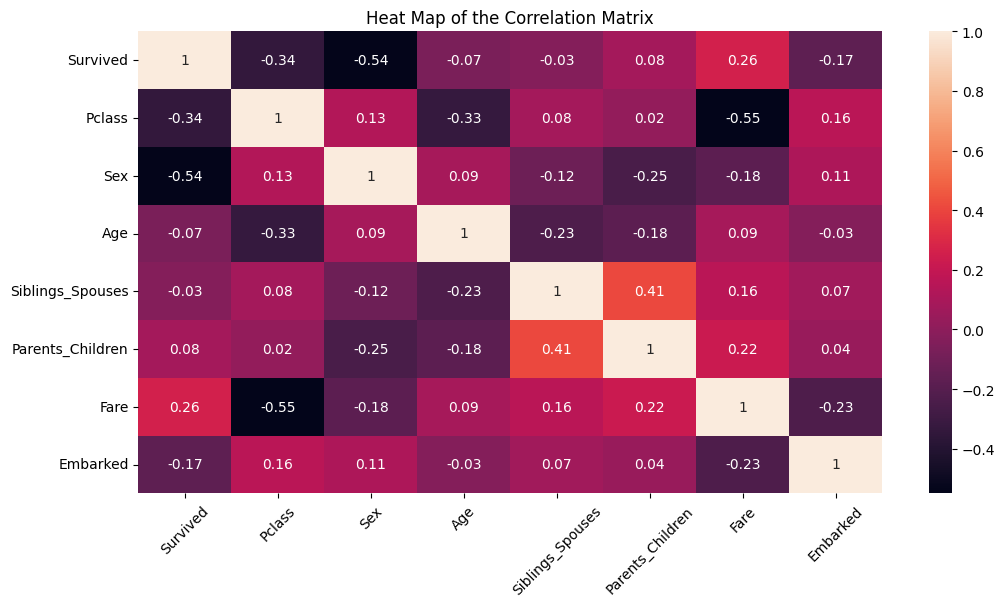

In [28]:
# Plot correlation matrix as a heat map
plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix.round(2), square=False, annot=True)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.title("Heat Map of the Correlation Matrix")
plt.show()

<b>Result Interpretation</b> ‘Survived’ has a moderate correlation with ‘Pclass’ (-0.34) and ‘Fare’ (0.26) but a stronger correlation with ‘Sex’ (0.54). ‘Survived’ has a mild correlation with ‘Embarked’ (-0.17). Survived has no correlation with ‘Siblings_Spouses’ (-0.03) or ‘Parents_Children’ (0.08).

#### Visualize the Data - The Role of Passenger Gender

In [29]:
# Count the number of male and female passengers in the training data set
male_passengers = df_train[(df_train['Sex'] == 1)]['Sex'].count()
female_passengers = df_train[(df_train['Sex'] == 0)]['Sex'].count()

In [30]:
# Count the number of male and female survivors in the training data set
male_survivors = df_train[(df_train['Survived'] == 1) & (df_train['Sex'] == 1)]['Sex'].count()
female_survivors = df_train[(df_train['Survived'] == 1) & (df_train['Sex'] == 0)]['Sex'].count()

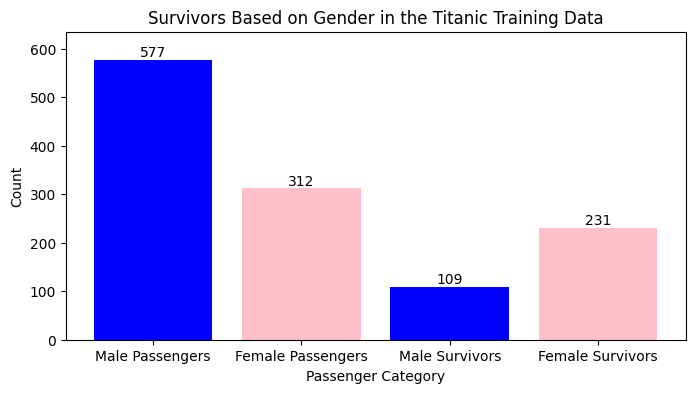

In [31]:
# Create the data for the bar chart
survivor_categories = ['Male Passengers', 'Female Passengers', 'Male Survivors', 'Female Survivors']
survivor_counts = [male_passengers, female_passengers, male_survivors, female_survivors]

# Create the bar chart
plt.figure(figsize=(8, 4))
bars = plt.bar(survivor_categories, survivor_counts, color=['blue', 'pink', 'blue', 'pink'])
plt.xlabel('Passenger Category')
plt.ylabel('Count')
plt.title('Survivors Based on Gender in the Titanic Training Data')
# Add counts above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')
# Move the y-limits to fit the number above the bar
plt.ylim(0, max(survivor_counts) * 1.1)

# Show the plot
plt.show()

<b>Result Interpretation:</b> The number of male passengers outnumbered the number of female passengers by almost 2-to-1, but the number of female survivors outnumbered the number of male survivors by more than 2-to-1.

#### Visualize the Data - The Role of Passenger Class

In [32]:
# Count the number of passengers in each class in the training data set
class1_passengers = df_train[(df_train['Pclass'] == 1)]['Pclass'].count()
class2_passengers = df_train[(df_train['Pclass'] == 2)]['Pclass'].count()
class3_passengers = df_train[(df_train['Pclass'] == 3)]['Pclass'].count()

In [33]:
# Count the number of survivors in each class in the training data set
class1_survivors = df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 1)]['Pclass'].count()
class2_survivors = df_train[(df_train['Pclass'] == 2) & (df_train['Survived'] == 1)]['Pclass'].count()
class3_survivors = df_train[(df_train['Pclass'] == 3) & (df_train['Survived'] == 1)]['Pclass'].count()

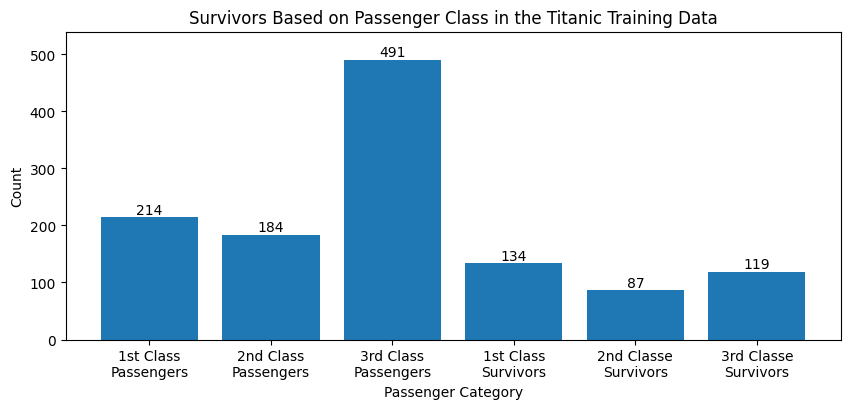

In [34]:
# Create the data for the bar chart
survivor_categories = ['1st Class\nPassengers', '2nd Class\nPassengers', '3rd Class\nPassengers',
                       '1st Class\nSurvivors', '2nd Classe\nSurvivors', '3rd Classe\nSurvivors']
survivor_counts = [class1_passengers, class2_passengers, class3_passengers, class1_survivors, class2_survivors, class3_survivors]

# Create the bar chart
plt.figure(figsize=(10, 4))
bars = plt.bar(survivor_categories, survivor_counts)
plt.xlabel('Passenger Category')
plt.ylabel('Count')
plt.title('Survivors Based on Passenger Class in the Titanic Training Data')
# Add counts above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')
# Move the y-limits to fit the number above the bar
plt.ylim(0, max(survivor_counts) * 1.1)

# Show the plot
plt.show()

<b>Result Interpretation:</b> More passengers were registered in Third Class than First Class and Second Class combined, but First Class passengers had the higher number of survivors compared to Second Class or Third Class.

#### EDA - Descriptive Statistics

In [35]:
# EDA: Describe the numerical features of the DataSet
pd.set_option('display.precision', 2)  # Set precision to 2 decimal places
# Display the descriptive statistics after dropping the categorical data
df_train.drop(columns=['PassengerId', 'Survived', 'Pclass', 'Sex', 'Embarked']).describe()

,Age,Siblings_Spouses,Parents_Children,Fare
count,889.00,889.00,889.00,889.00
mean,29.64,0.52,0.38,32.10
std,12.97,1.10,0.81,49.70
min,0.42,0.00,0.00,0.00
25%,22.00,0.00,0.00,7.90
50%,29.64,0.00,0.00,14.45
75%,35.00,1.00,0.00,31.00
max,80.00,8.00,6.00,512.33


<b>Result Interpretation</b> The mean ‘Age’ is 29.64 years, with a standard deviation (std) of 12.97 years. The oldest passenger was 80 years old and the youngest is less than a year old. ‘Siblings_Spouses’ has a mean of 0.52, while ‘Parents_Children’ has a mean of 0.38. This implies that the passengers were adults who did not bring children.

## Build Machine Learning Models

#### Split the Data into Training and Testing Data Sets

In [36]:
# Create the training data set
X_train = df_train[['Pclass', 'Sex', 'Embarked', 'Age', 'Siblings_Spouses', 'Parents_Children', 'Fare']]
y_train = df_train['Survived']

In [37]:
# Create the testing data set
X_test = df_test[['Pclass', 'Sex', 'Embarked', 'Age', 'Siblings_Spouses', 'Parents_Children', 'Fare']]

In [38]:
# Define the data features
features = ['Pclass', 'Sex', 'Embarked', 'Age', 'Siblings_Spouses', 'Parents_Children', 'Fare']

<b>Note:</b> There is no value for y_test since this column was dropped from the data by the data set provider, Kaggle.

#### Standardize the Data

In [39]:
# Create a StandardScaler object and standardize the data
scaler = StandardScaler()
X_trainS = scaler.fit_transform(X_train)
X_testS = scaler.transform(X_test)

<b>Methodology:</b> These general steps were used to build and evaluate the machine learning classifier models:
1. Create the classifier models
2. Use Recursive Feature Elimination (RFE) or Sequential Feature Selector (SFS) to select the features that are the best predictors for optimal model performance.
3. Perform cross-validation (CV) to evaluate model predictive performance.
4. Train the models using the training data (X_trainS)
5. Evaluate the results to find the best classifier.


#### Model #1 - Logistic Regression Classifier

In [40]:
# Create the Logistic Regression Classifier
logit_clfr = LogisticRegression()

In [41]:
# Apply Recursive Feature Elimination (RFE) to find the best predictor features
rfe_logit_clfr = RFE(estimator=logit_clfr, n_features_to_select=5)
X_train_rfe = rfe_logit_clfr.fit_transform(X_trainS, y_train)
selected_features_rfe_logit_clfr = {}
selected_features_rfe_logit_clfr = [features[i] for i in range(len(features)) if rfe_logit_clfr.support_[i]]
print(f"Logistic Regression selected features: {selected_features_rfe_logit_clfr}")    

Logistic Regression selected features: ['Pclass', 'Sex', 'Embarked', 'Age', 'Siblings_Spouses']


In [42]:
# Perform cross-validation on the RFE-selected features
logit_clfr_cv_scores_rfe = cross_val_score(rfe_logit_clfr, X_train_rfe, y_train, cv=5) 
print(f"Logistic Regression cross-validation scores (RFE-selected features): {logit_clfr_cv_scores_rfe}")
print(f"Logistic Regression mean cross-validation score(RFE-selected features: {logit_clfr_cv_scores_rfe.mean()}")

Logistic Regression cross-validation scores (RFE-selected features): [0.78651685 0.78089888 0.78651685 0.7752809  0.82485876]
Logistic Regression mean cross-validation score(RFE-selected features: 0.7908144480416428


In [43]:
# Perform cross-validation on ALL the features
logit_clfr_cv_scores = cross_val_score(logit_clfr, X_trainS, y_train, cv=5) 
print(f"Logistic Regression cross-validation scores (ALL features): {logit_clfr_cv_scores}")
print(f"Logistic Regression mean cross-validation score (ALL features): {logit_clfr_cv_scores.mean()}")

Logistic Regression cross-validation scores (ALL features): [0.7752809  0.78651685 0.78089888 0.76404494 0.81920904]
Logistic Regression mean cross-validation score (ALL features): 0.7851901225163461


In [44]:
# Fit the logistic regression model to the training data
logit_clfr.fit(X_trainS, y_train)

LogisticRegression()

In [45]:
# Make predictions on the training data
logit_clfr_predict = logit_clfr.predict(X_testS)

In [46]:
# Place the predictions into a pandas DataFrame
df_logit_predictions = pd.DataFrame({
                        'PassengerId': df_test['PassengerId'],
                        'Survived': logit_clfr_predict})

In [47]:
# Save the predictions to a file in the 'predictions' directory
df_logit_predictions.to_csv(f'predictions/logit_clfr_submission.csv', index=False)

In [48]:
# Calculate the 'Survived' class probabilities
logit_clfr_pred_proba = logit_clfr.predict_proba(X_testS)

In [49]:
# Display the first 5 'Survived' class probability values
logit_clfr_pred_proba[:5]

array([[0.90409846, 0.09590154],
       [0.63900358, 0.36099642],
       [0.90402188, 0.09597812],
       [0.89787635, 0.10212365],
       [0.42279724, 0.57720276]])

#### Model #2 - K-Nearest Neighbors Classifier

In [50]:
# Create the KNN Classifier
knn_clfr = KNeighborsClassifier(n_neighbors=5)

<b>Note:</b> RFE does not support the K-nearest neighbors classifier because KNN lacks the 'coef_' or 'feature_importances_' attributes.
SequentialFeatureSelector() (SFS) was used instead of RFE for KNN.

In [51]:
# Apply SequentialFeatureSelector() (SFS) to find the best predictor features
sfs_knn_clfr = SequentialFeatureSelector(knn_clfr, n_features_to_select=5, direction='forward')
X_train_sfs = sfs_knn_clfr.fit_transform(X_trainS, y_train)
selected_features_sfs_knn_clfr = {}
selected_features_sfs_knn_clfr = [features[i] for i in range(len(features)) if sfs_knn_clfr.get_support()[i]]
print(f"K-nearest neighbors selected features: {selected_features_sfs_knn_clfr}")

K-nearest neighbors selected features: ['Pclass', 'Sex', 'Embarked', 'Siblings_Spouses', 'Parents_Children']


In [52]:
# Perform cross-validation on the SFS-selected features
knn_clfr_cv_scores_sfs = cross_val_score(knn_clfr, X_train_sfs, y_train, cv=5) 
print(f"K-nearest neighbors cross-validation scores (SFS-selected features): {knn_clfr_cv_scores_sfs}")
print(f"K-nearest neighbors mean cross-validation score(SFS-selected features: {knn_clfr_cv_scores_sfs.mean()}")  

K-nearest neighbors cross-validation scores (SFS-selected features): [0.76404494 0.79775281 0.81460674 0.80337079 0.82485876]
K-nearest neighbors mean cross-validation score(SFS-selected features: 0.8009268075922046


In [53]:
# Perform cross-validation on ALL the features
knn_clfr_cv_scores = cross_val_score(knn_clfr, X_trainS, y_train, cv=5) 
print(f"K-nearest neighbor cross-validation scores (ALL features): {knn_clfr_cv_scores}")
print(f"K-nearest neighbor mean cross-validation score (ALL features): {knn_clfr_cv_scores.mean()}")

K-nearest neighbor cross-validation scores (ALL features): [0.78089888 0.76966292 0.82022472 0.81460674 0.82485876]
K-nearest neighbor mean cross-validation score (ALL features): 0.8020504030978227


In [54]:
# Fit the KNN model to the training data
knn_clfr.fit(X_trainS, y_train)

KNeighborsClassifier()

In [55]:
# Make predictions on the training data
knn_clfr_predict = knn_clfr.predict(X_testS)

In [56]:
# Place the predictions into a pandas DataFrame
df_knn_predictions = pd.DataFrame({
                        'PassengerId': df_test['PassengerId'],
                        'Survived': knn_clfr_predict})

In [57]:
# Save the predictions to a file in the 'predictions' directory
df_knn_predictions.to_csv(f'predictions/knn_clfr_submission.csv', index=False)

In [58]:
# Calculate the 'Survived' class probabilities
knn_clfr_pred_proba = knn_clfr.predict_proba(X_testS)

In [59]:
# Display the first 5 'Survived' class probability values
knn_clfr_pred_proba[:5]

array([[1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.6, 0.4]])

#### Model #3 - Decision Tree Classifier

In [60]:
# Create the Decision Tree Classifier
dtree_clfr = DecisionTreeClassifier()

In [61]:
# Apply Recursive Feature Elimination (RFE) to find the best predictor features
rfe_dtree_clfr = RFE(estimator=dtree_clfr, n_features_to_select=5)
X_train_rfe = rfe_dtree_clfr.fit_transform(X_trainS, y_train)
selected_features_rfe_dtree_clfr = {}
selected_features_rfe_dtree_clfr = [features[i] for i in range(len(features)) if rfe_dtree_clfr.support_[i]]
print(f"Decision tree selected features: {selected_features_rfe_dtree_clfr}")  

Decision tree selected features: ['Pclass', 'Sex', 'Age', 'Siblings_Spouses', 'Fare']


In [62]:
# Perform cross-validation on the RFE-selected features
dtree_clfr_cv_scores_rfe = cross_val_score(rfe_dtree_clfr, X_train_rfe, y_train, cv=5) 
print(f"Decision tree cross-validation scores (RFE-selected features): {dtree_clfr_cv_scores_rfe}")
print(f"Decision tree mean cross-validation score(RFE-selected features: {dtree_clfr_cv_scores_rfe.mean()}")  

Decision tree cross-validation scores (RFE-selected features): [0.69662921 0.78089888 0.82022472 0.76404494 0.77966102]
Decision tree mean cross-validation score(RFE-selected features: 0.7682917539516283


In [63]:
# Perform cross-validation on ALL the features
dtree_clfr_cv_scores = cross_val_score(dtree_clfr, X_trainS, y_train, cv=5) 
print(f"Decision tree cross-validation scores (ALL features): {dtree_clfr_cv_scores}")
print(f"Decision tree mean cross-validation score (ALL features): {dtree_clfr_cv_scores.mean()}")

Decision tree cross-validation scores (ALL features): [0.71910112 0.75842697 0.79775281 0.74157303 0.8079096 ]
Decision tree mean cross-validation score (ALL features): 0.7649527074208088


In [64]:
# Fit the decision tree model to the training data
dtree_clfr.fit(X_trainS, y_train)

DecisionTreeClassifier()

In [65]:
# Make predictions on the training data
dtree_clfr_predict = dtree_clfr.predict(X_testS)

In [66]:
# Place the predictions into a pandas DataFrame
df_dtree_predictions = pd.DataFrame({
                        'PassengerId': df_test['PassengerId'],
                        'Survived': dtree_clfr_predict})

In [67]:
# Save the predictions to a file in the 'predictions' directory
df_dtree_predictions.to_csv(f'predictions/dtree_clfr_submission.csv', index=False)

In [68]:
# Calculate the 'Survived' class probabilities
dtree_clfr_pred_proba = dtree_clfr.predict_proba(X_testS)

In [69]:
# Display the first 5 'Survived' class probability values
dtree_clfr_pred_proba[:5]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

#### Model #4 - Bagging Classifier

In [70]:
# Create the Bagging Classifier
bagging_clfr = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)

 <b>Note:</b> RFE does not support the bagging classifier because bagging lacks the 'coef_' or 'feature_importances_' attributes.
SequentialFeatureSelector() (SFS) was used instead of RFE for the bagging classifier.

In [71]:
# Apply SequentialFeatureSelector() (SFS) to find the best predictor features
sfs_bagging_clfr = SequentialFeatureSelector(bagging_clfr, n_features_to_select=5, direction='forward')
X_train_sfs = sfs_bagging_clfr.fit_transform(X_trainS, y_train)
selected_features_sfs_bagging_clfr = {}
selected_features_sfs_bagging_clfr = [features[i] for i in range(len(features)) if sfs_bagging_clfr.get_support()[i]]
print(f"Bagging classifier selected features: {selected_features_sfs_bagging_clfr}")

Bagging classifier selected features: ['Pclass', 'Sex', 'Age', 'Parents_Children', 'Fare']


In [72]:
# Perform cross-validation on the SFS-selected features
bagging_clfr_cv_scores_sfs = cross_val_score(bagging_clfr, X_train_sfs, y_train, cv=5) 
print(f"Bagging classifier cross-validation scores (SFS-selected features): {bagging_clfr_cv_scores_sfs}")
print(f"Bagging classifier mean cross-validation score(SFS-selected features: {bagging_clfr_cv_scores_sfs.mean()}")  

Bagging classifier cross-validation scores (SFS-selected features): [0.7752809  0.80898876 0.87078652 0.78651685 0.79096045]
Bagging classifier mean cross-validation score(SFS-selected features: 0.8065066971370533


In [73]:
# Perform cross-validation on ALL the features
bagging_clfr_cv_scores = cross_val_score(bagging_clfr, X_trainS, y_train, cv=5) 
print(f"Bagging classifier cross-validation scores (ALL features): {bagging_clfr_cv_scores}")
print(f"Bagging classifier mean cross-validation score (ALL features): {bagging_clfr_cv_scores.mean()}")

Bagging classifier cross-validation scores (ALL features): [0.78089888 0.80898876 0.84831461 0.7752809  0.83050847]
Bagging classifier mean cross-validation score (ALL features): 0.8087983241287373


In [74]:
# Fit the bagging classifier model to the training data
bagging_clfr.fit(X_trainS, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)

In [75]:
# Make predictions on the training data
bagging_clfr_predict = bagging_clfr.predict(X_testS)

In [76]:
# Place the predictions into a pandas DataFrame
df_bagging_predictions = pd.DataFrame({
                        'PassengerId': df_test['PassengerId'],
                        'Survived': bagging_clfr_predict})

In [77]:
# Save the predictions to a file in the 'predictions' directory
df_bagging_predictions.to_csv(f'predictions/bagging_clfr_submission.csv', index=False)

In [78]:
# Calculate the 'Survived' class probabilities
bagging_clfr_pred_proba = bagging_clfr.predict_proba(X_testS)

In [79]:
# Display the first 5 'Survived' class probability values
bagging_clfr_pred_proba[:5]

array([[0.82, 0.18],
       [0.74, 0.26],
       [0.46, 0.54],
       [0.38, 0.62],
       [0.56, 0.44]])

#### Model #5 - Random Forest Classifier

In [80]:
# Create the Random Forest Classifier
rforest_clfr = RandomForestClassifier(n_estimators=100)

In [81]:
# Apply Recursive Feature Elimination (RFE) to find the best predictor features
rfe_rforest_clfr = RFE(estimator=rforest_clfr, n_features_to_select=5)
X_train_rfe = rfe_rforest_clfr.fit_transform(X_trainS, y_train)
selected_features_rfe_rforest_clfr = {}
selected_features_rfe_rforest_clfr = [features[i] for i in range(len(features)) if rfe_rforest_clfr.support_[i]]
print(f"Random forest selected features: {selected_features_rfe_rforest_clfr}")  

Random forest selected features: ['Pclass', 'Sex', 'Age', 'Siblings_Spouses', 'Fare']


In [82]:
# Perform cross-validation on the RFE-selected features
rforest_clfr_cv_scores_rfe = cross_val_score(rfe_rforest_clfr, X_train_rfe, y_train, cv=5) 
print(f"Random forest cross-validation scores (RFE-selected features): {rforest_clfr_cv_scores_rfe}")
print(f"Random forest mean cross-validation score(RFE-selected features: {rforest_clfr_cv_scores_rfe.mean()}")  

Random forest cross-validation scores (RFE-selected features): [0.76404494 0.79775281 0.84269663 0.80337079 0.83615819]
Random forest mean cross-validation score(RFE-selected features: 0.8088046721259443


In [83]:
# Perform cross-validation on ALL the features
rforest_clfr_cv_scores = cross_val_score(rforest_clfr, X_trainS, y_train, cv=5) 
print(f"Random forest cross-validation scores (ALL features): {rforest_clfr_cv_scores}")
print(f"Random forest mean cross-validation score (ALL features): {rforest_clfr_cv_scores.mean()}")

Random forest cross-validation scores (ALL features): [0.78651685 0.81460674 0.84831461 0.7752809  0.83615819]
Random forest mean cross-validation score (ALL features): 0.8121754586427983


In [84]:
# Fit the random forest model to the training data
rforest_clfr.fit(X_trainS, y_train)

RandomForestClassifier()

In [85]:
# Make predictions on the training data
rforest_clfr_predict = rforest_clfr.predict(X_testS)

In [86]:
# Place the predictions into a pandas DataFrame
df_rforest_predictions = pd.DataFrame({
                        'PassengerId': df_test['PassengerId'],
                        'Survived': rforest_clfr_predict})

In [87]:
# Save the predictions to a file in the 'predictions' directory
df_rforest_predictions.to_csv(f'predictions/rforest_clfr_submission.csv', index=False)

In [88]:
# Calculate the 'Survived' class probabilities
rforest_clfr_pred_proba = rforest_clfr.predict_proba(X_testS)

In [89]:
# Display the first 5 'Survived' class probability values
rforest_clfr_pred_proba[:5]

array([[0.95412698, 0.04587302],
       [0.8       , 0.2       ],
       [0.71      , 0.29      ],
       [0.34      , 0.66      ],
       [0.6       , 0.4       ]])

#### Model #6 - AdaBoost Classifier

In [90]:
# Create the AdaBoost Classifier
ada_clfr = AdaBoostClassifier(n_estimators=50)

In [91]:
# Apply Recursive Feature Elimination (RFE) to find the best predictor features
rfe_ada_clfr = RFE(estimator=ada_clfr, n_features_to_select=5)
X_train_rfe = rfe_ada_clfr.fit_transform(X_trainS, y_train)
selected_features_rfe_ada_clfr = {}
selected_features_rfe_ada_clfr = [features[i] for i in range(len(features)) if rfe_ada_clfr.support_[i]]
print(f"AdaBoost selected features: {selected_features_rfe_ada_clfr}")  

AdaBoost selected features: ['Pclass', 'Sex', 'Age', 'Siblings_Spouses', 'Fare']


In [92]:
# Perform cross-validation on the RFE-selected features
ada_clfr_cv_scores_rfe = cross_val_score(rfe_ada_clfr, X_train_rfe, y_train, cv=5) 
print(f"AdaBoost cross-validation scores (RFE-selected features): {ada_clfr_cv_scores_rfe}")
print(f"Logistic Regression mean cross-validation score(RFE-selected features: {ada_clfr_cv_scores_rfe.mean()}")  

AdaBoost cross-validation scores (RFE-selected features): [0.74719101 0.81460674 0.81460674 0.81460674 0.84745763]
Logistic Regression mean cross-validation score(RFE-selected features: 0.80769377261474


In [93]:
# Perform cross-validation on ALL the features
ada_clfr_cv_scores = cross_val_score(ada_clfr, X_trainS, y_train, cv=5) 
print(f"AdaBoost cross-validation scores (ALL features): {ada_clfr_cv_scores}")
print(f"AdaBoost mean cross-validation score (ALL features): {ada_clfr_cv_scores.mean()}")

AdaBoost cross-validation scores (ALL features): [0.75842697 0.81460674 0.80898876 0.79213483 0.82485876]
AdaBoost mean cross-validation score (ALL features): 0.7998032120865867


In [94]:
# Fit the AdaBoost model to the training data
ada_clfr.fit(X_trainS, y_train)

AdaBoostClassifier()

In [95]:
# Make predictions on the training data
ada_clfr_predict = ada_clfr.predict(X_testS)

In [96]:
# Place the predictions into a pandas DataFrame
df_ada_predictions = pd.DataFrame({
                        'PassengerId': df_test['PassengerId'],
                        'Survived': ada_clfr_predict})

In [97]:
# Save the predictions to a file in the 'predictions' directory
df_ada_predictions.to_csv(f'predictions/ada_clfr_submission.csv', index=False)

In [98]:
# Calculate the 'Survived' class probabilities
ada_clfr_pred_proba = ada_clfr.predict_proba(X_testS)

In [99]:
# Display the first 5 'Survived' class probability values
ada_clfr_pred_proba[:5]

array([[0.508128  , 0.491872  ],
       [0.50232653, 0.49767347],
       [0.50443698, 0.49556302],
       [0.51363407, 0.48636593],
       [0.50018567, 0.49981433]])

#### Model #7 - Gradient Boost Classifier

In [100]:
# Create the Gradient Boost Classifier
gboost_clfr = GradientBoostingClassifier(n_estimators=100)

In [101]:
# Apply Recursive Feature Elimination (RFE) to find the best predictor features
rfe_gboost_clfr = RFE(estimator=gboost_clfr, n_features_to_select=5)
X_train_rfe = rfe_gboost_clfr.fit_transform(X_trainS, y_train)
selected_features_rfe_gboost_clfr = {}
selected_features_rfe_gboost_clfr = [features[i] for i in range(len(features)) if rfe_gboost_clfr.support_[i]]
print(f"Gradient boost selected features: {selected_features_rfe_gboost_clfr}")  

Gradient boost selected features: ['Pclass', 'Sex', 'Age', 'Siblings_Spouses', 'Fare']


In [102]:
# Perform cross-validation on the RFE-selected features
gboost_clfr_cv_scores_rfe = cross_val_score(rfe_gboost_clfr, X_train_rfe, y_train, cv=5) 
print(f"Gradient boost cross-validation scores (RFE-selected features): {gboost_clfr_cv_scores_rfe}")
print(f"Gradient boost mean cross-validation score(RFE-selected features: {gboost_clfr_cv_scores_rfe.mean()}")  

Gradient boost cross-validation scores (RFE-selected features): [0.81460674 0.8258427  0.85955056 0.81460674 0.83615819]
Gradient boost mean cross-validation score(RFE-selected features: 0.8301529867326858


In [103]:
# Perform cross-validation on ALL the features
gboost_clfr_cv_scores = cross_val_score(gboost_clfr, X_trainS, y_train, cv=5) 
print(f"Gradient boost cross-validation scores (ALL features): {gboost_clfr_cv_scores}")
print(f"Gradient boost mean cross-validation score (ALL features): {gboost_clfr_cv_scores.mean()}")

Gradient boost cross-validation scores (ALL features): [0.80337079 0.83146067 0.84269663 0.79775281 0.85310734]
Gradient boost mean cross-validation score (ALL features): 0.8256776487018346


In [104]:
# Fit the gradient boost model to the training data
gboost_clfr.fit(X_trainS, y_train)

GradientBoostingClassifier()

In [105]:
# Make predictions on the training data
gboost_clfr_predict = gboost_clfr.predict(X_testS)

In [106]:
# Place the predictions into a pandas DataFrame
df_gboost_predictions = pd.DataFrame({
                        'PassengerId': df_test['PassengerId'],
                        'Survived': gboost_clfr_predict})

In [107]:
# Save the predictions to a file in the 'predictions' directory
df_gboost_predictions.to_csv(f'predictions/gboost_clfr_submission.csv', index=False)

In [108]:
# Calculate the 'Survived' class probabilities
gboost_clfr_pred_proba = gboost_clfr.predict_proba(X_testS)

In [109]:
# Display the first 5 'Survived' class probability values
gboost_clfr_pred_proba[:5]

array([[0.92766851, 0.07233149],
       [0.7973349 , 0.2026651 ],
       [0.76941103, 0.23058897],
       [0.84907316, 0.15092684],
       [0.62381081, 0.37618919]])

#### Model #8 - Support Vector Machine Classifier

In [110]:
# Create a Support Vector Machine Classifier
svm_clfr = SVC(kernel='rbf', probability=True)

<b>Note:</b> RFE does not support the support vector machine classifier because SVM lacks the 'coef_' or 'feature_importances_' attributes when using the 'rbf' kernel. SequentialFeatureSelector() (SFS) was used instead of RFE for the SVM classifier.

In [111]:
# Apply SequentialFeatureSelector() (SFS) to find the best predictor features
sfs_svm_clfr = SequentialFeatureSelector(svm_clfr, n_features_to_select=5, direction='forward')
X_train_sfs = sfs_svm_clfr.fit_transform(X_trainS, y_train)
selected_features_sfs_svm_clfr = {}
selected_features_sfs_svm_clfr = [features[i] for i in range(len(features)) if sfs_svm_clfr.get_support()[i]]
print(f"Support vector machine selected features: {selected_features_sfs_svm_clfr}")

Support vector machine selected features: ['Pclass', 'Sex', 'Age', 'Siblings_Spouses', 'Parents_Children']


In [112]:
# Perform cross-validation on the SFS-selected features
svm_clfr_cv_scores_sfs = cross_val_score(svm_clfr, X_train_sfs, y_train, cv=5) 
print(f"Support vector machine cross-validation scores (SFS-selected features): {svm_clfr_cv_scores_sfs}")
print(f"Support vector machine mean cross-validation score(SFS-selected features: {svm_clfr_cv_scores_sfs.mean()}")  

Support vector machine cross-validation scores (SFS-selected features): [0.83146067 0.82022472 0.82022472 0.80898876 0.85310734]
Support vector machine mean cross-validation score(SFS-selected features: 0.8268012442074525


In [113]:
# Perform cross-validation on ALL the features
svm_clfr_cv_scores = cross_val_score(svm_clfr, X_trainS, y_train, cv=5) 
print(f"Support vector machine cross-validation scores (ALL features): {svm_clfr_cv_scores}")
print(f"Support vector machine mean cross-validation score (ALL features): {svm_clfr_cv_scores.mean()}")

Support vector machine cross-validation scores (ALL features): [0.83146067 0.82022472 0.81460674 0.80337079 0.86440678]
Support vector machine mean cross-validation score (ALL features): 0.8268139402018664


In [114]:
# Fit the support vector machine model to the training data
svm_clfr.fit(X_trainS, y_train)

SVC(probability=True)

In [115]:
# Make predictions on the training data
svm_clfr_predict = svm_clfr.predict(X_testS)

In [116]:
# Place the predictions into a pandas DataFrame
df_svm_predictions = pd.DataFrame({
                        'PassengerId': df_test['PassengerId'],
                        'Survived': svm_clfr_predict})

In [117]:
# Save the predictions to a file in the 'predictions' directory
df_svm_predictions.to_csv(f'predictions/svm_clfr_submission.csv', index=False)

In [118]:
# Calculate the 'Survived' class probabilities
svm_clfr_pred_proba = svm_clfr.predict_proba(X_testS)

In [119]:
# Display the first 5 'Survived' class probability values
svm_clfr_pred_proba[:5]

array([[0.84171659, 0.15828341],
       [0.51152677, 0.48847323],
       [0.87721759, 0.12278241],
       [0.84858846, 0.15141154],
       [0.57794046, 0.42205954]])

#### Model #9 - Perceptron Classifer

In [120]:
# Create the Perceptron Classifier
percep_clfr = MLPClassifier(max_iter=1_500)

<b>Note:</b> RFE does not support the perceptron classifier because SVM lacks the 'coef_' or 'feature_importances_' attributes.
SequentialFeatureSelector() (SFS) was used instead of RFE for the SVM classifier.

In [121]:
# Apply SequentialFeatureSelector() (SFS) to find the best predictor features
sfs_percep_clfr = SequentialFeatureSelector(percep_clfr, n_features_to_select=5, direction='forward')
X_train_sfs = sfs_percep_clfr.fit_transform(X_trainS, y_train)
selected_features_sfs_percep_clfr = {}
selected_features_sfs_percep_clfr = [features[i] for i in range(len(features)) if sfs_percep_clfr.get_support()[i]]
print(f"Perceptron selected features: {selected_features_sfs_percep_clfr}")

Perceptron selected features: ['Pclass', 'Sex', 'Age', 'Siblings_Spouses', 'Parents_Children']


In [122]:
# Perform cross-validation on the SFS-selected features
percep_clfr_cv_scores_sfs = cross_val_score(percep_clfr, X_train_sfs, y_train, cv=5) 
print(f"Perceptron cross-validation scores (SFS-selected features): {percep_clfr_cv_scores_sfs}")
print(f"Perceptron mean cross-validation score(SFS-selected features: {percep_clfr_cv_scores_sfs.mean()}") 

Perceptron cross-validation scores (SFS-selected features): [0.79775281 0.80898876 0.8258427  0.80898876 0.85875706]
Perceptron mean cross-validation score(SFS-selected features: 0.8200660191709515


In [123]:
# Perform cross-validation on ALL the features
percep_clfr_cv_scores = cross_val_score(percep_clfr, X_trainS, y_train, cv=5) 
print(f"Perceptron cross-validation scores (ALL features): {percep_clfr_cv_scores}")
print(f"Perceptron mean cross-validation score (ALL features): {percep_clfr_cv_scores.mean()}")

Perceptron cross-validation scores (ALL features): [0.78651685 0.78089888 0.83146067 0.81460674 0.85875706]
Perceptron mean cross-validation score (ALL features): 0.8144480416428618


<b>Note:</b> The perceptron classifier produced a cross-validation score consistently above 0.8. It also required more time to run than the other models since there had to be over 1,500 iterations to run the model. Running less iterations produced a ‘convergence error.’

In [124]:
# Fit the perceptron model to the training data
percep_clfr.fit(X_trainS, y_train)

MLPClassifier(max_iter=1500)

In [125]:
# Make predictions on the training data
percep_clfr_predict = percep_clfr.predict(X_testS)

In [126]:
# Place the predictions into a pandas DataFrame
df_percep_predictions = pd.DataFrame({
                        'PassengerId': df_test['PassengerId'],
                        'Survived': percep_clfr_predict})

In [127]:
# Save the predictions to a file in the 'predictions' directory
df_percep_predictions.to_csv(f'predictions/percep_clfr_submission.csv', index=False)

In [128]:
# Calculate the 'Survived' class probabilities
percep_clfr_pred_proba = percep_clfr.predict_proba(X_testS)

In [129]:
# Display the first 5 'Survived' class probability values
percep_clfr_pred_proba[:5]

array([[0.95633293, 0.04366707],
       [0.73791804, 0.26208196],
       [0.9842656 , 0.0157344 ],
       [0.90098411, 0.09901589],
       [0.691393  , 0.308607  ]])

## Selecting the Optimal Machine Learning Model

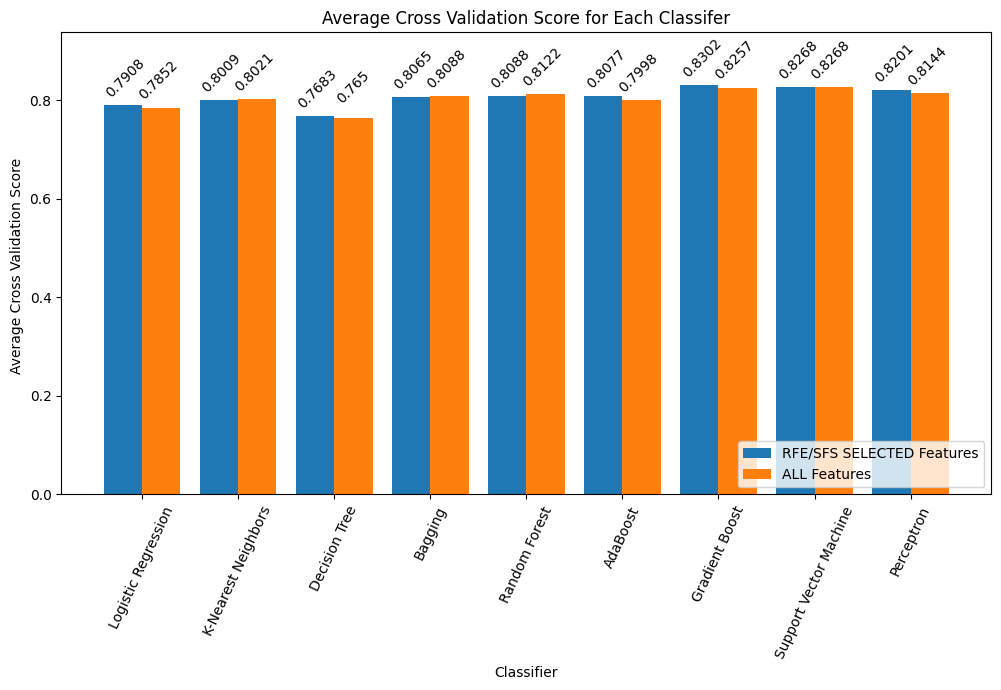

In [130]:
# Create model names for comparison
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Bagging', 
          'Random Forest', 'AdaBoost', 'Gradient Boost', 'Support Vector Machine', 'Perceptron']

# Collect the cross validation scores for models using ALL features
cross_validation_scores = [logit_clfr_cv_scores.mean(), knn_clfr_cv_scores.mean(), dtree_clfr_cv_scores.mean(), 
                           bagging_clfr_cv_scores.mean(), rforest_clfr_cv_scores.mean(), ada_clfr_cv_scores.mean(), 
                           gboost_clfr_cv_scores.mean(), svm_clfr_cv_scores.mean(), percep_clfr_cv_scores.mean()]

# Collect the cross validation scores for models using SELECTED features
cross_validation_scores_selected = [logit_clfr_cv_scores_rfe.mean(), knn_clfr_cv_scores_sfs.mean(), dtree_clfr_cv_scores_rfe.mean(), 
                           bagging_clfr_cv_scores_sfs.mean(), rforest_clfr_cv_scores_rfe.mean(), ada_clfr_cv_scores_rfe.mean(), 
                           gboost_clfr_cv_scores_rfe.mean(), svm_clfr_cv_scores_sfs.mean(), percep_clfr_cv_scores_sfs.mean()]

# Plot a double bar chart with the average cross validation scores for each model
plt.figure(figsize=(12,6))

X_axis = np.arange(len(models)) 
bar1 = plt.bar(X_axis - 0.2, cross_validation_scores_selected, 0.4, label = 'RFE/SFS SELECTED Features') 
bar2 = plt.bar(X_axis + 0.2,cross_validation_scores, 0.4, label = 'ALL Features') 
plt.xlabel('Classifier')
plt.ylabel('Average Cross Validation Score ')
plt.xticks(rotation=65)
plt.title('Average Cross Validation Score for Each Classifer')
#plt.axhline(y=np.mean(cross_validation_scores), color='r', linestyle='--')

# Add the X-axis ticks
plt.xticks(X_axis, models) 

# Place values over the bars
for bar in bar1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.2, yval + 0.1, round(yval, 4), ha='left', va='top', color='black', rotation=45)

# Place values over the bars
for bar in bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 + 0.2, yval + 0.1, round(yval, 4), ha='right', va='top', color='black', rotation=45)

# Plot the legend
plt.legend(loc='lower right')

# Expand the y-limits to include the scores above the bars
plt.ylim(0, max(max(cross_validation_scores), max(cross_validation_scores_selected)) * 1.13)

# Display the plot
plt.show()

<b>Result Interpretation:</b> The performance for all models approached or exceeded an average cross validation score of 0.8. The highest scoring models include the Gradient Boost classifier, Support Vector Machine classifier, and the Random Forest classifier.

## Validate the Optimal Models

<b>Important Note:</b> The Titanic dataset provided by Kaggle does not include the y_test  target variable ‘Survived’ in the testing dataset. The reason is that the Kaggle Titanic dataset is part of a contest where participants submit their values of y_test to Kaggle who will evaluate the accuracy of the predictions. 

For this reason, the ‘training’ dataset was sub-divided into ‘training’ and ‘validation’ datasets for the purpose of model validation using the Receiver Operating Characteristic (ROC) Curve. Based on the cross-validation scores, the best three models were selected for validation.


#### Create the training and validation data sets

In [131]:
# Split the 'X-train' data into model training and validation sets
X_train_val, X_val, y_train_val, y_val = train_test_split(X_trainS, y_train, test_size=0.2, random_state=42)

#### Build the models to be validated

In [132]:
# Create a Gradient Boost classifier validation model
gboost_clfr_val = GradientBoostingClassifier(n_estimators=100)

In [133]:
# Fit the gradient boost model to the training data
gboost_clfr_val.fit(X_train_val, y_train_val)

GradientBoostingClassifier()

In [134]:
# Make predictions on the training data
gboost_clfr_val_predict = gboost_clfr_val.predict(X_val)

In [135]:
# Calculate the 'Survived' class probabilities
gboost_clfr_val_pred_proba = gboost_clfr_val.predict_proba(X_val)[:, 1]

In [136]:
# Calculate the ROC curve and AUC score
fpr_gboost, tpr_gboost, thresholds_gboost = roc_curve(y_val, gboost_clfr_val_pred_proba)
roc_auc_gboost = roc_auc_score(y_val, gboost_clfr_val_pred_proba)

In [137]:
# Create a Support Vector Machine classifier validation model
svm_clfr_val = SVC(kernel='rbf', probability=True)

In [138]:
# Fit the Support Vector Machine model to the training data
svm_clfr_val.fit(X_train_val, y_train_val)

SVC(probability=True)

In [139]:
# Make predictions on the training data
svm_clfr_val_predict = svm_clfr_val.predict(X_val)

In [140]:
# Calculate the 'Survived' class probabilities
svm_clfr_val_pred_proba = svm_clfr_val.predict_proba(X_val)[:, 1]

In [141]:
# Calculate the ROC curve and AUC score
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_val, svm_clfr_val_pred_proba)
roc_auc_svm = roc_auc_score(y_val, svm_clfr_val_pred_proba)

In [142]:
# Create the Random Forest Classifier validation model
rforest_clfr_val = RandomForestClassifier(n_estimators=100)

In [143]:
# Fit the Random Forest model to the training data
rforest_clfr_val.fit(X_train_val, y_train_val)

RandomForestClassifier()

In [144]:
# Make predictions on the training data
rforest_clfr_val_predict = rforest_clfr_val.predict(X_val)

In [145]:
# Calculate the 'Survived' class probabilities
rforest_clfr_val_pred_proba = rforest_clfr_val.predict_proba(X_val)[:, 1]

In [146]:
# Calculate the ROC curve and AUC score
fpr_rforest, tpr_rforest, thresholds_forest = roc_curve(y_val, rforest_clfr_val_pred_proba)
roc_auc_rforest = roc_auc_score(y_val, rforest_clfr_val_pred_proba)

#### Plot the ROC Curve for the Validation Dataset

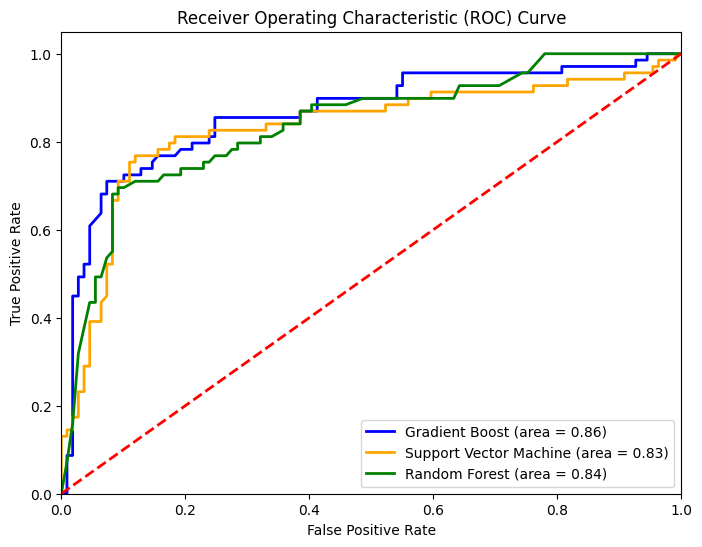

In [147]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gboost, tpr_gboost, color='blue', lw=2, label=f'Gradient Boost (area = {roc_auc_gboost:0.2f})')
plt.plot(fpr_svm, tpr_svm, color='orange', lw=2, label=f'Support Vector Machine (area = {roc_auc_svm:0.2f})')
plt.plot(fpr_rforest, tpr_rforest, color='green', lw=2, label=f'Random Forest (area = {roc_auc_rforest:0.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

<b>Result Interpretation:</b> The top three performing models from cross-validation were selected for the ROC Curve validation. The Gradient Boost classifier performed the best with an ROC score, while the Support Vector Machine and Random Forest both had an ROC scores were close. The ideal score would be 1.0 and the curve would be drawn close to the upper left corner of the graph (indicating a high True Positive Rate and a low False Positive Rate). The red diagonal line indicates an ROC score that results from random guessing.

## Improving Logistic Regression with Regularization

<b>Discussion:</b> The logistic regression classifier was one of the underperforming models according to the cross-validation results. One way to improve a model is to prevent overfitting. This is done using regularization, a technique used to prevent overfitting by working to reduce large coefficients in models by introducing a penalty term. 

In [148]:
# Create the Logistic Regression Classifier with no regularization
logit_clfr_noreg = LogisticRegression()

In [149]:
# Create a logistic Regression model with L2 regularization
logit_clfr_L2 = LogisticRegression(penalty='l2', C=0.1)

In [150]:
# Fit the non-regularized logistic regression model
logit_clfr_noreg.fit(X_train_val, y_train_val)

LogisticRegression()

In [151]:
# Fit the regularized logistic regression model
logit_clfr_L2.fit(X_train_val, y_train_val)

LogisticRegression(C=0.1)

In [152]:
# Calculate the predicted probabilities of the non-regularized model
logit_clfr_noreg_y_val_probs = logit_clfr_noreg.predict_proba(X_val)[:, 1]

In [153]:
# Calculate the predicted probabilities of the L2-regularized model
logit_clfr_L2_y_val_probs = logit_clfr_L2.predict_proba(X_val)[:, 1]

In [154]:
# Calculate the ROC curve and AUC score for the non-regularized model
fpr_logit_clfr_noreg, tpr_logit_clfr_noreg, thresholds_logit_clfr_noreg = roc_curve(y_val, logit_clfr_noreg_y_val_probs)
roc_auc_logit_clfr_noreg = roc_auc_score(y_val, logit_clfr_noreg_y_val_probs)

In [155]:
# Calculate the ROC curve and AUC score for the L2-regularized model
fpr_logit_clfr_L2, tpr_logit_clfr_L2, thresholds_logit_clfr_L2 = roc_curve(y_val, logit_clfr_L2_y_val_probs)
roc_auc_logit_clfr_L2 = roc_auc_score(y_val, logit_clfr_L2_y_val_probs)

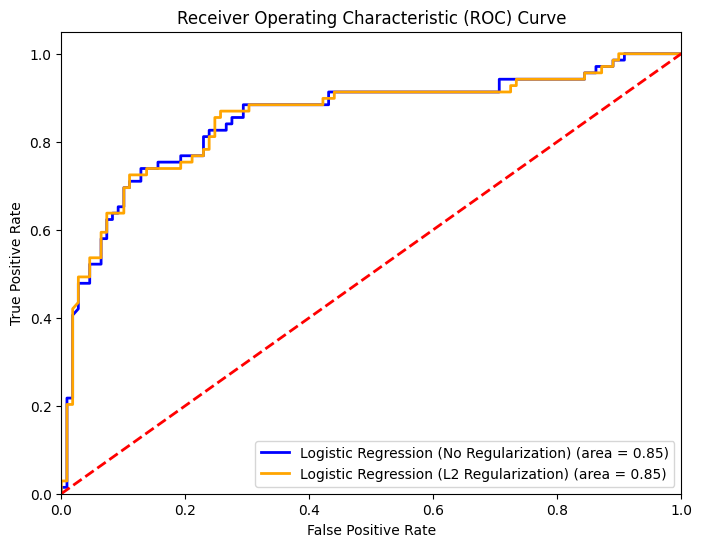

In [156]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_logit_clfr_noreg, tpr_logit_clfr_noreg, color='blue', \
         lw=2, label=f'Logistic Regression (No Regularization) (area = {roc_auc_logit_clfr_noreg:0.2f})')
plt.plot(fpr_logit_clfr_L2, tpr_logit_clfr_L2, color='orange', \
         lw=2, label=f'Logistic Regression (L2 Regularization) (area = {roc_auc_logit_clfr_L2:0.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

<b>Result Interpretation:</b> Applying L2 regularization did not seem to help the logistic regression model’s ROC score. This has the positive meaning that the model does not appear to suffer from overfitting.

## Determine the Most Often Selected Features

#### Tabulate the most often selected features from all of the models

In [157]:
# Place all of the selected features into one combined Python list
selected_features_combined = selected_features_rfe_logit_clfr + \
                             selected_features_sfs_knn_clfr + \
                             selected_features_rfe_dtree_clfr + \
                             selected_features_sfs_bagging_clfr + \
                             selected_features_rfe_rforest_clfr + \
                             selected_features_rfe_ada_clfr + \
                             selected_features_rfe_gboost_clfr + \
                             selected_features_sfs_svm_clfr + \
                             selected_features_sfs_percep_clfr

In [158]:
# Calculate the selected feature counts
feature_counts = Counter(selected_features_combined)

# Sort the selected features by their counts
feature_counts = dict(sorted(feature_counts.items(), key=lambda item: item[1], reverse=True))

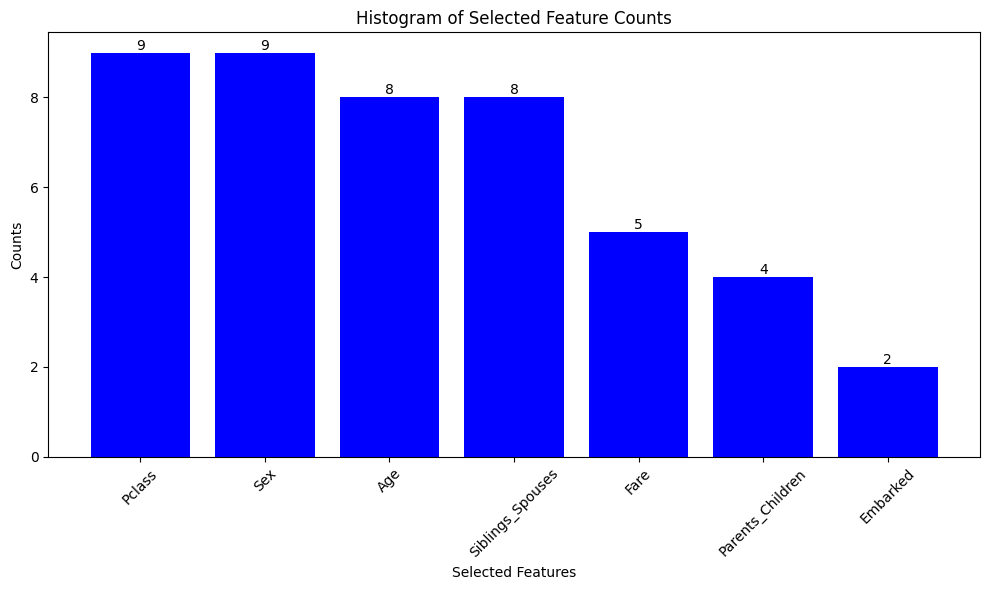

In [159]:
# Plot the selected feature counts as a histogram
plt.figure(figsize=(10, 6))
bars = plt.bar(feature_counts.keys(), feature_counts.values(), color='blue')
plt.xlabel('Selected Features')
plt.ylabel('Counts')
plt.title('Histogram of Selected Feature Counts')
plt.xticks(rotation=45)

# Place the feature count number above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

<b>Result Interpretation:</b> According to Recursive Feature Elimination (RFE) and Sequential Feature Selector (SFS), passenger class (‘Pclass’) and passenger gender (‘Sex’) were the most often selected features over multiple runs. Other features like passenger age (‘Age’) and 'Siblings_Spouses' appeared  over multiple runs.

## Conclusion

According to cross-validation, the gradient boost classifier followed by the support vector machine and random forest classifiers were the most accurate machine learning models. Using feature selection like RFE and SFS, the most frequently selected features used for model training include a passenger’s gender (‘Sex’), the passenger class (‘Pclass’), their age (‘Age’) and the number of siblings and spouse (‘Siblings_Spouses’).

The ratio of male to female passengers was almost 2-to-1, but most of the surviving passengers were female. The survivors also tended to be from First Class (‘Pclass’=1).

One logical question to ask is: How many lifeboats were there on the Titanic, and why couldn’t more people be saved? Unfortunately, the data set does not have the number of life boats as a data feature. Space on a lifeboat became a precious commodity for Titanic’s passengers, and one wonders how many lives were saved based on their ability to afford one.
